

# Project: Investigate a movie database to determine characteristics of movies sucessfull at the box office from 2010 to 2015 (inclusive)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

##### <a id='intro'></a>
## Introduction

This project analysyses the movie data present in the TMDB database which provides revenue, genre, cast, title, and other movie information for movies from 1960 to 2015. We will use this database to clean-up and extract information we need for the analysis of movies released from 2010 to 2015.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

# Importing Packages

import numpy as np
import pandas as pd

<a id='wrangling'></a>
## Data Wrangling

List the first few rows to understand the fields and data format. Examine the data for null/empty values and query data stats to understand max, min etc. to make the appropriate cleaning decisions before analyzing the data.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#Reading CSV and print the top 5 rows

df = pd.read_csv('tmdb_movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#Check if thare are any null value fields

pd.isnull(df).sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [4]:
#Check if there are any Zeroes, we can see from Min value that budget, revenue, runtime, budget_adj and revenue_adj have zeroes

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
#Check the rows with zero revenue
df[df["revenue"] == 0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.0
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.0
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000e+00,0.0
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.000000e+00,0.0
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0
93,307663,tt3480796,1.872696,10000000,0,Vice,Ambyr Childers|Thomas Jane|Bryan Greenberg|Bru...,NaN,Brian A Miller,Where the future is your past.,...,Julian Michaels has designed the ultimate reso...,96,Thriller|Science Fiction|Action|Adventure,Grindstone Entertainment Group|K5 Internationa...,1/16/15,181,4.1,2015,9.199996e+06,0.0
100,326359,tt4007502,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,NaN,Chris Buck|Jennifer Lee,NaN,...,"On Anna's birthday, Elsa and Kristoff are dete...",8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.0,2015,0.000000e+00,0.0
101,254302,tt0462335,1.661789,0,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,NaN,Ben Wheatley,Leave the real world behind,...,Dr. Robert Laing is the newest resident of a l...,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,9/26/15,161,5.4,2015,0.000000e+00,0.0
103,292040,tt3321300,1.646664,0,0,Spooks: The Greater Good,Peter Firth|Kit Harington|Jennifer Ehle|Lara P...,http://www.shinepictures.co.uk/films/9/spooks-...,Bharat Nalluri,NaN,...,During a handover to the head of counter-terro...,104,Thriller|Action,BBC Films|Isle of Man Film|Shine Pictures|Kudo...,4/11/15,114,5.6,2015,0.000000e+00,0.0
116,297291,tt3086386,1.380320,0,0,The Scorpion King: The Lost Throne,Victor Webster|Ellen Hollman|Barry Bostwick|Wi...,NaN,Mike Elliott,Action Adventure,...,"When he is betrayed by a trusted friend, Matha...",105,Action|Fantasy|Adventure,Universal Pictures,1/9/15,22,4.5,2015,0.000000e+00,0.0


In [6]:
#Lookup specific imdb_ids to check for uniqueness and duplication
#check for invalid genre values
#df[df["imdb_id"] == "tt2231253"]

df[df["imdb_id"] == "tt3247714"]

df[df["genres"] == "..."]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


### Data Cleaning (Remove Data which has no revenue or neglible revenue reporting and remove data prior to 2010)


In [7]:
# Ignoring data with no revenue numbers or < 50K
df = df[df["revenue"] >= 50000 ]
# Ignoring data with no budget numbers or < 50K
df = df[df["budget"] >= 50000 ]
# Ignoring data with release date before 1/1/201
df = df[df["release_year"] > 2009 ]
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1002.000000,1002.000000,1.002000e+03,1.002000e+03,1002.000000,1002.000000,1002.000000,1002.000000,1.002000e+03,1.002000e+03
mean,120569.783433,1.777016,4.737870e+07,1.437266e+08,108.443114,901.056886,6.174152,2012.434132,4.504786e+07,1.362567e+08
std,87454.687500,2.274152,5.513546e+07,2.283294e+08,18.152073,1179.320957,0.776002,1.711497,5.251779e+07,2.155749e+08
min,189.000000,0.010335,1.000000e+05,5.013600e+04,62.000000,10.000000,2.200000,2010.000000,9.199996e+04,4.612510e+04
25%,49691.750000,0.686944,1.183250e+07,1.379664e+07,96.000000,180.000000,5.700000,2011.000000,1.093544e+07,1.289249e+07
50%,82684.500000,1.120216,2.761000e+07,6.006237e+07,106.000000,445.000000,6.200000,2012.000000,2.577527e+07,5.648651e+07
75%,192139.750000,2.059014,6.000000e+07,1.647489e+08,118.000000,1141.250000,6.700000,2014.000000,5.698466e+07,1.570550e+08
max,417859.000000,32.985763,4.250000e+08,2.068178e+09,338.000000,9767.000000,8.200000,2015.000000,4.250000e+08,1.902723e+09


In [8]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#All data cleaning done above, checking null value fields again
pd.isnull(df).sum()

id                        0
imdb_id                   0
popularity                0
budget                    0
revenue                   0
original_title            0
cast                      1
homepage                351
director                  0
tagline                  68
keywords                 47
overview                  0
runtime                   0
genres                    0
production_companies      4
release_date              0
vote_count                0
vote_average              0
release_year              0
budget_adj                0
revenue_adj               0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Which genres of movies made the highest revenue for movies released from 2010 to 2015?

In [9]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

#Which Genres of movie make the highest revenue?

a = df['genres'].unique()

#np.sort(a)

#print(a)
myGenreList = []

# collect data from and process each row
for item in a:
    # set up a dictionary to hold the values for the cleaned and trimmed
            # data point
    b = item.split("|")
    myGenreList.extend(b)

#print("out of loop")
#print (myGenreList)
myGListDF = pd.DataFrame(myGenreList, columns=["Genres"])
myUniqueGenres = myGListDF["Genres"].unique()
np.sort(myUniqueGenres)
print(myUniqueGenres)
myUniqueGListDF = pd.DataFrame(myUniqueGenres, columns=["UniqueGenres"])
myUniqueGListDF = myUniqueGListDF.assign(Revenue = 0.0)
myUniqueGListDF.head()
#print('step1')

           
# collect data from and process each row
for index1, row1 in df.iterrows():
    item = row1['genres']
    genres = item.split("|")
    #print('iteration loop 1')
    for tmp in genres:
        #print('loop 2')
        for index2, row2 in myUniqueGListDF.iterrows():
            #print('loop 3')
            if row2['UniqueGenres'] == tmp:
                #print('adding revenue')
                myUniqueGListDF.at[index2, 'Revenue'] = myUniqueGListDF['Revenue'][index2] + row1['revenue']/1000000000.0
#print('step2')
myUniqueGListDF = myUniqueGListDF.sort_values(by='Revenue', ascending=False)
myUniqueGListDF.head()




['Action' 'Adventure' 'Science Fiction' 'Thriller' 'Fantasy' 'Crime'
 'Western' 'Drama' 'Family' 'Animation' 'Comedy' 'Mystery' 'Romance' 'War'
 'History' 'Music' 'Horror' 'Documentary' 'Foreign']


,UniqueGenres,Revenue
1,Adventure,66.943523
0,Action,65.199387
10,Comedy,41.442885
2,Science Fiction,36.889324
7,Drama,36.199946


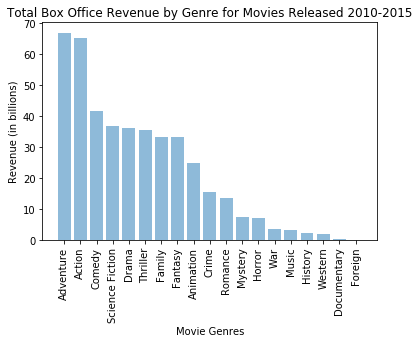

In [10]:
#Plot Bar Chart

import matplotlib.pyplot as plt; plt.rcdefaults()

# this is a 'magic word' that allows for plots to be displayed
# inline with the notebook. If you want to know more, see:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

# example histogram, data taken from bay area sample
import numpy as np
 
objects = myUniqueGListDF['UniqueGenres']
count = objects.count()
y_pos = np.arange(count )
 

data = myUniqueGListDF['Revenue']

plt.bar(y_pos, data, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation=90)
plt.ylabel('Revenue (in billions)')
plt.xlabel('Movie Genres')
plt.title('Total Box Office Revenue by Genre for Movies Released 2010-2015')
 
plt.show()


### Is there any correlation between movie budget and popularity for movies released from 2010 to 2015

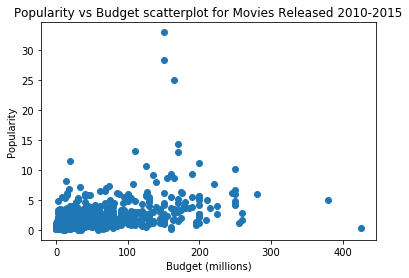

In [11]:
#Plot Scatter Plot

x = df['budget']/1000000.0;
y = df['popularity']
#colors = np.random.rand(N)
#area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii
plt.ylabel('Popularity')
plt.xlabel('Budget (millions)')
plt.title('Popularity vs Budget scatterplot for Movies Released 2010-2015')
#plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.scatter(x, y)
plt.show() 


#plt.xticks(y_pos, objects, rotation=90)

#plt.title('Total Box Office Revenue by Genre from 2013 to Present')
 



<a id='limitations'></a>
## Limitations and Challenges

#1: The data is little outdated (not current), the last release year that data was available on was for 2015. So a more accurate treand analysis based cannot be performed with this data since we need current data..

#2: It is not clear if the poularity numbers are very accurate or comparable across movies, as the vote count has a large variation across the different titles and is low for many of the movies. The 50% percentile vote count is only 445 and the range is 10 - 9767.

#3: There were some challenges I faced in identifying the missing data and in some cases unrealistic low revenue numbers for cetain movies skewed the data and it was not clear of the data was erroneous or an outlier, so these data rows had to be identified and ignored.

<a id='conclusions'></a>
## Conclusions

#1: From the first research question we can conclude that the most popular genres of movies for the years 2010 to 2015 has been - Adventure, Action, Comedy, Science Fiction, Drama and Thriller
The least popular genres of movies for the for the years 2010 to 2015 have been - Foreign, Documentary, Western, History and Music

#2: From the second research questions it is clear that there is no significant correlation between the budget of a movie and the popularity of the movie. However it can be seen that a higher percentage of low budget movies are unpopular. Also the most popular movies have been mid-budget movies.

In [12]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0